# REPORT EXPLORATORY DATA ANALYSIS PLOTS

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL , MSTL
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-ticks')
import os
from pathlib import Path
root_dir = Path(os.getcwd()).resolve().parent
os.chdir(root_dir)
from utils.data_preparation import preprocess_data, split_data, mapping

In [ ]:
features = ['h_poly', 'h', 'GV1', 'GV3', 'GV51', 'MB4', 'MB8', 'MB10', 'MB18', \
            'P', 'T', 't', 'ln_t', 'Cos_s', 'Sin_s', 'Cos_2s', 'Sin_2s', 'month', 'year', \
            'h_MA_007', 'h_MA_014', 'h_MA_060', 'h_MA_180', 'h_RC_007', 'h_RC_030', 'T_MA_001', 'T_MA_007', 'T_MA_014', 'T_MA_030', \
            'P_RS_030', 'P_RS_060', 'P_RS_090', 'P_RS_180']
target = 'h'
poly_degree = 4
start_date = "08-01-2020"
end_date = "03-01-2025"
# validation_size = 0.2
test_size = 0.2

X, y, dates = preprocess_data(features, target, start_date, end_date, poly_degree=poly_degree, \
                               test_size=test_size, validation_size=0)
    
X_train, X_test, y_train, y_test, split_index = split_data(X, y, test_size=test_size)
X_all = pd.concat([X_train, X_test])
print(split_index)

In [ ]:
print(X_train)

In [ ]:
# Plot the ACF for the resampled data
fig, ax = plt.subplots(figsize=(12, 8))
plot_acf(X_all['h'], ax=ax, lags=8760)  # Resample to daily data! or monthly even!
plt.show()

In [ ]:
# Plotting all precipitation data
plt.clf()
plt.figure(figsize=(10, 6))

# Adding labels and title
plt.title('Precipitation with Rolling Sum', fontsize=18, fontweight='bold')
plt.plot(dates, X_all['P'], label='Precipitation', linewidth=2)
plt.plot(dates, X_all['P_RS_030'], label='Rolling Sum 30 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_060'], label='Rolling Sum 60 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_090'], label='Rolling Sum 90 Days', alpha=.8)
plt.plot(dates, X_all['P_RS_180'], label='Rolling Sum 180 Days', alpha=.8)
plt.axvline(x=dates.iloc[split_index], color='black', alpha=0.8, linestyle=':')
# plt.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
plt.xlabel('Date-Time')
plt.ylabel('Values [mm/h]')

# Show plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)  
plt.grid()
plt.show()

In [ ]:
# Plotting all reservoir data
plt.clf()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)  

# Adding labels and title
ax1.set_title('Reservoir Level with Moving average and Rate of Change', fontsize=18, fontweight='bold')
ax1.plot(dates, X_all['h'], label='Reservoir level', linewidth=2)
ax1.plot(dates, X_all['h_MA_007'], label='MA 7 Days', alpha=.8)
ax1.plot(dates, X_all['h_MA_014'], label='MA 14 Days', alpha=.8)
ax1.plot(dates, X_all['h_MA_060'], label='MA 60 Days', alpha=.8)
ax1.axvline(x=dates.iloc[split_index], color='black', alpha=0.8, linestyle=':')
# ax1.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Reservoir water level (MASL)')
ax1.legend(loc='lower left')
ax1.grid(True)

ax2.plot(dates, X_all['h_RC_007'], label='RoC 7 Days', alpha=.8)
ax2.plot(dates, X_all['h_RC_030'], label='RoC 14 Days', alpha=.8)
ax2.axvline(x=dates.iloc[split_index], color='black', alpha=0.8, linestyle=':')
# ax2.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
ax2.set_ylabel('Rate of change (%)')
ax2.grid(True)
ax2.legend(loc='upper left')

# Show plot
plt.xticks(rotation=45)  
fig.tight_layout()  

plt.grid()
plt.show()

In [ ]:
# Plotting all precipitation data
plt.clf()
plt.figure(figsize=(10, 6))

# Adding labels and title
plt.title('Air Temperature with Moving Average', fontsize=18, fontweight='bold')
plt.plot(dates, X_all['T'], label='Air Temp', linewidth=2)
plt.plot(dates, X_all['T_MA_001'], label='MA 1 Days', alpha=.8)
plt.plot(dates, X_all['T_MA_007'], label='MA 7 Days', alpha=.8)
plt.plot(dates, X_all['T_MA_014'], label='MA 14 Days', alpha=.8)
plt.plot(dates, X_all['T_MA_030'], label='MA 30 Days', alpha=.8)
plt.axvline(x=dates.iloc[split_index], color='black', alpha=0.8, linestyle=':')
# plt.axvline(x=dates.iloc[split_idx_test], color='black', alpha=0.8, linestyle=':')
plt.xlabel('Date-Time')
plt.ylabel('Temp (C)')

# Show plot
plt.legend(loc='lower right')
plt.xticks(rotation=45)  
plt.grid()
plt.show()

In [3]:
path = f'./data/LOS_DAMM_{mapping('h')}.csv'
data = pd.read_csv(path, sep=';', parse_dates=['Date-Time'])
# Set 'Date-Time' as the index
data.set_index('Date-Time', inplace=True)

# Accessing the 'x' column as a pandas Series with the 'Date-Time' as index
x_series = data['ÖVY']

print(x_series)

Date-Time
2020-08-01 00:00:00    564.93
2020-08-01 01:00:00    564.93
2020-08-01 02:00:00    564.93
2020-08-01 03:00:00    564.94
2020-08-01 04:00:00    564.94
                        ...  
2025-02-28 20:00:00    557.59
2025-02-28 21:00:00    557.59
2025-02-28 22:00:00    557.59
2025-02-28 23:00:00    557.59
2025-03-01 00:00:00    557.60
Name: ÖVY, Length: 40149, dtype: float64


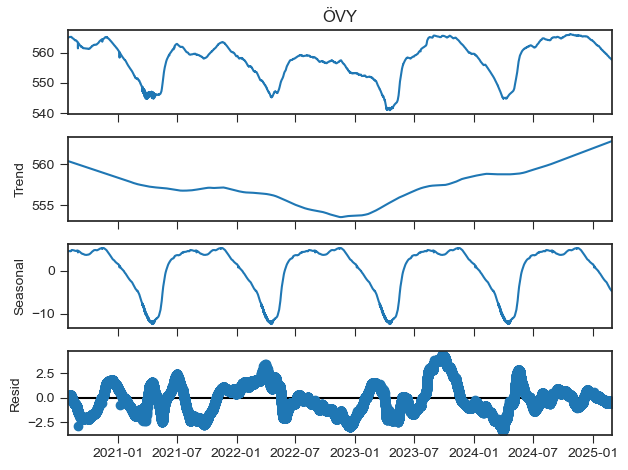

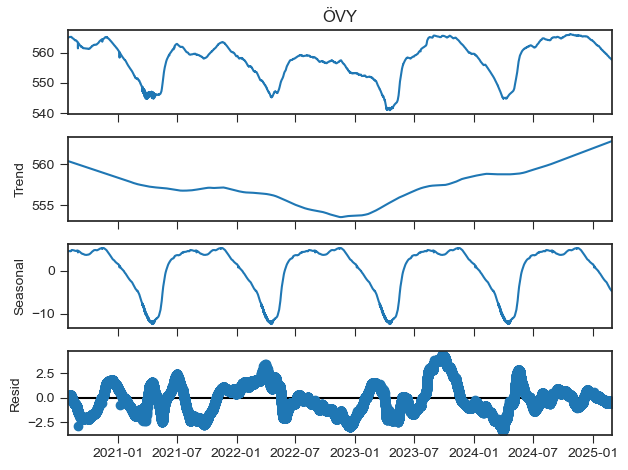

In [6]:
decomp = seasonal_decompose(x_series, model='additive', period=24*365, extrapolate_trend=1)
decomp.plot()

In [8]:
def plot_components(result):
    # Combine all the components into a DataFrame
    df = pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)
    df = df.rename(columns={'observed': 'Original Data', 'seasonal': 'Seasonal', 'trend': 'Trend', 'resid': 'Residual'})

    components = df.columns
    rows = len(components)

    # Create subplots with the appropriate number of rows
    fig, axes = plt.subplots(rows, 1, figsize=(10, 2 * rows), sharex=True)

    # In case we have only one component, axes is not a list, so we need to handle that
    if rows == 1:
        axes = [axes]

    # Plot each component
    for i, col in enumerate(components):
        axes[i].plot(df.index, df[col], label=col, color='tab:blue' if col == 'Original Data' else 'tab:orange')
        axes[i].set_title(col)
        axes[i].legend(loc='upper left')
        axes[i].set_ylabel(col)

    # Set the labels and title for the entire figure
    plt.xlabel('Time')
    fig.suptitle('Time Series Decomposition', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the suptitle

    # Show the plot
    plt.show()